In [1]:
# Start off with labeled Cuisines (will have to capture unlabeled: Other)

def plotCuisines(cuisines, df):
    
    print(df.shape)
    
    ht = np.zeros((1, len(cuisines)))

    for i, c in enumerate(cuisines):
        ht[0, i] = df[c].value_counts()[1] / df.shape[0]
        print(c, df[c].value_counts()[1], ht[0, i])

    if ht.sum() != 1:
        cuisines.append("Other")
        with_other = np.append(ht, 1-ht.sum())

    print("Did all Cuisine Categories add to 1? ", with_other.sum() == 1)

    plt.figure(figsize=(16,8))
    plt.grid(True, zorder=0)
    plt.bar(range(len(cuisines)), height=with_other, tick_label = cuisines, zorder=2)
    plt.ylabel("Proportion from Sample Set")
    plt.xlabel("Cuisines");
    

#### Aug. 11, 7pm

In [2]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD

---

#### Function Definitions

In [3]:
def time_Now():
    import datetime
    import pytz
    utc_now = pytz.utc.localize(datetime.datetime.utcnow())
    pst_now = utc_now.astimezone(pytz.timezone("America/Los_Angeles"))
    return (pst_now)

---
### Modified: 

In [4]:
print("Last modified on: ", time_Now())

Last modified on:  2018-08-12 11:05:49.628402-07:00


---
#### Load US data

In [5]:
%%time
df = pd.read_pickle("newRev_VegCols_US.pkl")

CPU times: user 792 ms, sys: 504 ms, total: 1.3 s
Wall time: 1.29 s


In [6]:
df.shape

(923002, 20)

In [7]:
df.head(2)

,business_id,name,review_id,stars,date,text,useful,funny,cool,city,state,vegFriendly,Vegan,Vegetarian,Thai,Italian,Indian,Chinese,Mexican,Text_length
0,7eQoxWr9RzyCB9IFvqHUPA,Pizza Heaven Bistro,--4aCc43T0_g960EaIRf-w,4,2013-12-09,I was soooo happy when i open the menu and the...,4,0,4,Phoenix,AZ,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,186
1,8ro1QnWbUFZr6hJ4aOy3TA,Abuelo's,--6PFZka7og6Khaw6oyjvQ,3,2007-05-12,My fear with mexican restaurants is that at th...,0,0,0,Middleton,WI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,666


In [8]:
yy = df[df['useful'] != 0]

In [9]:
yy.head(2)

,business_id,name,review_id,stars,date,text,useful,funny,cool,city,state,vegFriendly,Vegan,Vegetarian,Thai,Italian,Indian,Chinese,Mexican,Text_length
0,7eQoxWr9RzyCB9IFvqHUPA,Pizza Heaven Bistro,--4aCc43T0_g960EaIRf-w,4,2013-12-09,I was soooo happy when i open the menu and the...,4,0,4,Phoenix,AZ,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,186
2,-8QlV3b_9H4BAh6LgMIr1g,Nandini Indian Cuisine,--c6GUtseZhMHA0rSfnN8w,5,2015-09-30,"This was our second, but certainly not our las...",1,0,1,Tempe,AZ,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,304


In [10]:
yy.shape

(408082, 20)

#### Plot Cuisine Distributions

(923002, 20)
Mexican 299827 0.3248389494280619
Chinese 167649 0.18163449266632142
Indian 50709 0.0549392092324827
Italian 246082 0.26661047321674275
Thai 106661 0.11555879618895734
Did all Cuisine Categories add to 1?  True


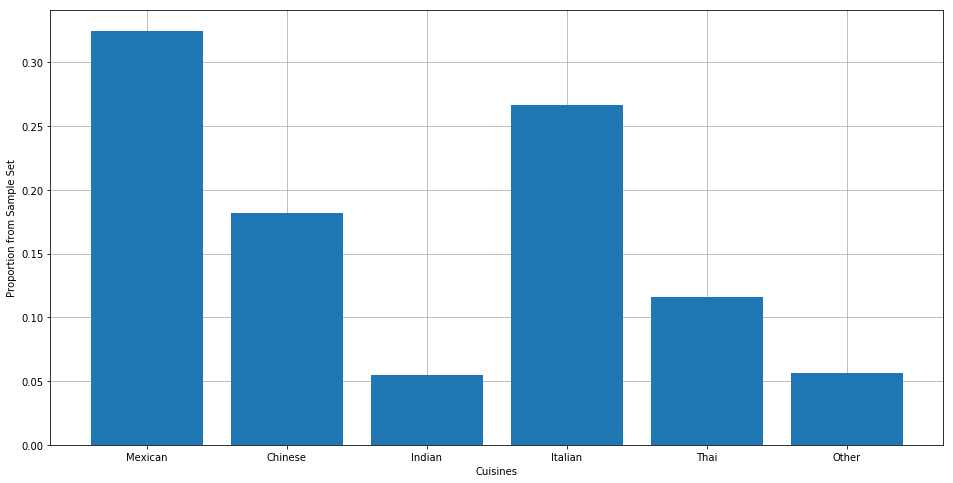

In [11]:
lbls = ["Mexican", "Chinese", "Indian", "Italian", "Thai"]

plotCuisines(lbls, df)

In [12]:
veg_mask = df.vegFriendly == 1

print("Percent of Vegan/Vgtrn Friendly reviews: ", (df[veg_mask].shape[0] / df.shape[0]) * 100)

Percent of Vegan/Vgtrn Friendly reviews:  20.48565441895034


---
## Veggie Friendly Data Metrics

(408082, 20)
Mexican 126355 0.3096313976112644
Chinese 76797 0.18819011865262375
Indian 24848 0.060889723143877944
Italian 111856 0.2741017736631363
Thai 44961 0.11017638611847619
Did all Cuisine Categories add to 1?  True


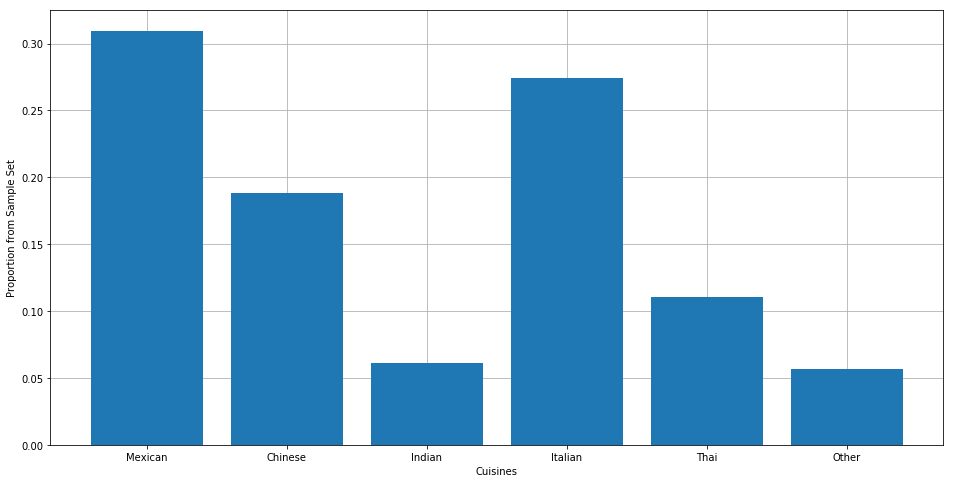

In [13]:
lbls2 = ["Mexican", "Chinese", "Indian", "Italian", "Thai"]

plotCuisines(lbls2, yy)

In [14]:
veg_mask = yy.vegFriendly == 1

print("Percent of Vegan/Vgtrn Friendly reviews (non-zero useful counts): ",\
      (yy[veg_mask].shape[0] / yy.shape[0]) * 100)

Percent of Vegan/Vgtrn Friendly reviews (non-zero useful counts):  20.939664087119745


In [15]:
yy['useful'].value_counts()[:10]

1     203005
2      90981
3      44462
4      23774
5      13739
6       8475
7       5495
8       3923
9       2743
10      2084
Name: useful, dtype: int64